# Summary statistics

## Re-do these with the new tree

On a tree with 365 tips - I want to check the tree I got the district jumps off. May need to remake one of them

### Branch lengths

- Max_H = 0.4187139080715566 
- Min_H = 0.07898788067423779


- Mean lengths = 0.024626764928399065
- Median lengths = 0.016550288168320965
- Variance in lengths = 0.0006479307331597084


- Mean external = 0.030683040421764732
- Median external = 0.022982686457671875
- Variance external = 0.0007669213909417984


- Mean internal = 0.01853712152597904
- Median internal = 0.012126822480269583
- Variance internal = 0.00045590389615045627


- Mean internal/external = 0.6041487828836514
- Median internal/external = 0.5276503468210313
- Variance internal/external = 0.5944597471594775

### Topology

 - Colless = 55126
 - Sackin = 6549
 - WD_Ratio = 0.7666666666666667
 - Delta_W = 9
 - max_ladder = 4
 - IL_nodes = 0.010958904109589041
 - staircase_1 = 0.0027472527472527475
 - staircase_2 = 0.6222222222222222


## Exploring Phylo

In [1]:
from Bio import Phylo
import numpy as np
import statistics
from collections import Counter
from collections import defaultdict

from io import StringIO
from re import *

import json

In [5]:
tree = Phylo.read("observed_tree.txt", 'newick')

string_tree = StringIO("observed_tree.txt")

In [6]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(comment='&chiefdom.set={"KissiTongi","Timidale","Mandu","Jawei","M...')
        Clade(branch_length=0.04201204246140988, comment='&length_range={2.507881418368E-6,0.4276205901572},chiefdo...')
            Clade(branch_length=0.019037850088479136, comment='&length_range={4.558633184923E-4,0.02081780303343},chiefd...')
                Clade(branch_length=0.02370772957656392, comment='&length_range={6.732619880453E-4,0.2159093786812},chiefdo...', name='134')
                Clade(branch_length=-0.00034282080567710205, comment='&length_range={7.982579327282E-4,0.1080093118639},chiefdo...')
                    Clade(branch_length=0.004011160815643233, comment='&length_range={1.506500836645E-5,0.05847847307979},chiefd...')
                        Clade(branch_length=0.013573377488480642, comment='&length_range={1.638890351762E-4,0.2144556083053},chiefdo...')
                            Clade(branch_length=0.003726286050532268, comment='&length_range={

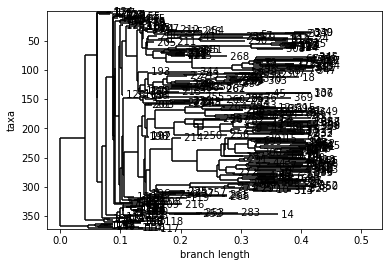

In [7]:
Phylo.draw(tree)

In [5]:
tips = tree.get_terminals()

In [6]:
len(tips)

365

In [7]:
nodes = tree.get_nonterminals()

In [8]:
len(nodes)

364

In [9]:
all_points = tips + nodes

## Branch length stuff

In [10]:
path_lists = []

for tip in tips:
    path_lists.append(tree.get_path(tip))
    
for node in nodes:
    path_lists.append(tree.get_path(node))
    
path_lists

[[Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...'),
  Clade(branch_length=0.0339293405929284, comment='&length_range={8.151348334373143E-6,0.09502031854756726},...', name='134')],
 [Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...'),
  Clade(branch_length=0.010354796666622035, comment='&length_range={2.423572374632421E-5,0.07949309081298755},...'),
  Clade(branch_length=-0.0021185499425958043, comment='&length_range={3.813666611097166E-4,0.06359531657981066},...'),
  Clade(branch_length=0.004206686985425534, comment='&length_range={7.590762762965664E-6,0.050387811729275644}...'),
  Clade(branch_length=0.02148640688347664, comment='&length_range={3.977753198127765E-4,0.09988369754135129},...', name='132')],
 [Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...'),
  Clade(branch_length=0.010354796666622

In [14]:
path_lengths = []

for path in path_lists:
    path_len = 0
    for clade in path:
        path_len += clade.branch_length
        
    path_lengths.append(path_len)

In [13]:
max_H = max(path_lengths)
min_H = min(path_lengths)

print(max_H, min_H)

0.4187139080715566 0.07898788067423779


In [14]:
branch_lengths = []
internal_branches = []
external_branches = []

for tip in tips:
    branch_lengths.append(tip.branch_length)
    external_branches.append(tip.branch_length)
    
    if tip.branch_length == None:
        print(tip)

for node in nodes:
    
    if node.branch_length:
    
        branch_lengths.append(node.branch_length)
        internal_branches.append(node.branch_length)
    
        

In [15]:
branch_lengths

[0.0339293405929284,
 0.02148640688347664,
 0.02148640688347664,
 0.025693093868902173,
 0.04340681716538991,
 0.009162713348367213,
 0.003683261293652429,
 0.024892000225981703,
 0.013059341849817385,
 0.008065681214598719,
 0.004446500578563162,
 0.0017067745512057697,
 0.0028030585771212646,
 0.030200318851149932,
 0.0029955425790637036,
 0.0028687447172905944,
 0.02752627896396187,
 0.010799065069264424,
 0.016278517123979208,
 0.04831425298459374,
 0.17708137627221016,
 0.07165895889404814,
 0.011384986291276017,
 0.002120532738133951,
 0.002305563130672983,
 0.002305563130672983,
 0.004727414943626385,
 0.010206866998341169,
 0.004630960653113136,
 0.06573333488163008,
 0.002719636251500568,
 0.004650678416204812,
 0.00191095238884742,
 0.005867538565458241,
 0.008693633200433648,
 0.01965253731009059,
 0.002875566137922947,
 0.009549128636812398,
 0.00542660511717602,
 0.04027732516620319,
 0.003985130080021382,
 0.03138239035405005,
 0.021377954013324874,
 0.013158775931025324,

In [16]:
statistics.mean(branch_lengths)

0.024626764928399065

In [17]:
statistics.variance(branch_lengths)

0.0006479307331597084

In [18]:
statistics.median(branch_lengths)

0.016550288168320965

In [19]:
statistics.mean(external_branches)
statistics.median(external_branches)
statistics.variance(external_branches)

0.0007669213909417984

In [20]:
statistics.mean(internal_branches)
#statistics.median(internal_branches)
#statistics.variance(internal_branches)

0.01853712152597904

In [21]:
statistics.variance(internal_branches)/statistics.variance(external_branches)

0.5944597471594775

## Topology set

In [23]:
colless = 0

for node in nodes:
    
    total_path = 0
    path = tree.get_path(node)
    
    for clade in path:
        total_path += clade.branch_length
        
    
    right = np.sum(i > total_path for i in path_lengths)
    left = np.sum(i <= total_path for i in path_lengths)
    
    difference = abs(left - right)
    
    colless += difference
    
    uneven = 0
    sum_ratios = []
    
    if right != left:
        uneven += 1

    if left<right:
        ratio = left/right
    elif right<left:
        ratio = right/left
    else:
        ratio = 1

    sum_ratios.append(ratio)
        
    staircase_1 = uneven/len(nodes)

    staircase_2 = np.mean(sum_ratios)
    
print(colless)
print(staircase_1)
print(staircase_2)

55126
0.0027472527472527475
0.622222222222


In [20]:
total_steps = 0
step_list = []

for path in path_lists:
    steps = len(path) #This includes the tip but not the root, so the number is actually right
    step_list.append(steps)
    total_steps += steps
    
print(total_steps)

6549


In [21]:
print(path_lists[1])

[Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...'), Clade(branch_length=0.010354796666622035, comment='&length_range={2.423572374632421E-5,0.07949309081298755},...'), Clade(branch_length=-0.0021185499425958043, comment='&length_range={3.813666611097166E-4,0.06359531657981066},...'), Clade(branch_length=0.004206686985425534, comment='&length_range={7.590762762965664E-6,0.050387811729275644}...'), Clade(branch_length=0.02148640688347664, comment='&length_range={3.977753198127765E-4,0.09988369754135129},...', name='132')]


In [22]:
widths = Counter(step_list)

In [23]:
widths

Counter({2: 1,
         5: 5,
         4: 3,
         9: 10,
         10: 16,
         11: 13,
         17: 13,
         18: 16,
         15: 14,
         14: 23,
         12: 22,
         6: 11,
         3: 1,
         7: 5,
         13: 14,
         19: 20,
         16: 9,
         8: 5,
         20: 14,
         22: 22,
         25: 17,
         27: 18,
         28: 13,
         24: 18,
         21: 15,
         23: 23,
         26: 17,
         29: 5,
         30: 2})

In [24]:
max_depth = max(widths)
max_width = widths.most_common()[0][1]

WD_ratio = max_width/max_depth

#delta_w

tup_list = []

for k,v in widths.items():
    tup = (k,v)
    tup_list.append(tup)

sorted_widths = sorted(tup_list, key=lambda tup:tup[0])

difference = 0

for index, tup in enumerate(sorted_widths):
    if index > 0:
        new_difference =  abs(tup[1] - sorted_widths[index-1][1])
        if new_difference > difference:
            difference = new_difference

delta_w = difference

In [25]:
print(WD_ratio)

0.7666666666666667


In [26]:
print(delta_w)

9


In [28]:
for i in tips:
    if not i.name:
        print(i)

In [38]:
def all_parents(tree):
    parents = {}
    child_dict = defaultdict(list)
    for clade in tree.find_clades(order='level'):
        for child in clade:
            parents[child] = clade
            child_dict[clade].append(child)
    return parents, child_dict

# Example
parents, child_dict = all_parents(tree)
#myclade = tree.find_clades("foo").next()
#parent_of_myclade = parents[myclade]


In [44]:
def go_up_ladder(nde, ladder_count, count_list):
    
    children = child_dict[nde]
    
    if (children[0].name and not children[1].name) or (children[1].name and not children[0].name):

        ladder_count += 1
        
        for i in children:
            if not i.name:
                go_up_ladder(i, ladder_count, count_list)
                
    else:
        
        count_list.append(ladder_count)
        
    return

In [46]:
count_list = []

for nde in nodes:

    ladder_count = 0

    go_up_ladder(nde, ladder_count, count_list)

longest_ladder = max(count_list)

ladder_likeness = longest_ladder/len(tips)

In [47]:
longest_ladder

4

In [48]:
ladder_likeness

0.010958904109589041

## LTT

In [11]:
class custom_node():
    
    def __init__(self, id_number, node_type, path_to_root, path_length):
        
        self.ID = id_number
        self.prep_path_to_root = path_to_root
        self.path_len = path_length
        self.type = node_type
        
        self.path_to_root = []
        
        self.children = []
        
        self.root = False
        
    

In [12]:
for i in path_lists:
    print(i, len(i))

[Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...'), Clade(branch_length=0.0339293405929284, comment='&length_range={8.151348334373143E-6,0.09502031854756726},...', name='134')] 2
[Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...'), Clade(branch_length=0.010354796666622035, comment='&length_range={2.423572374632421E-5,0.07949309081298755},...'), Clade(branch_length=-0.0021185499425958043, comment='&length_range={3.813666611097166E-4,0.06359531657981066},...'), Clade(branch_length=0.004206686985425534, comment='&length_range={7.590762762965664E-6,0.050387811729275644}...'), Clade(branch_length=0.02148640688347664, comment='&length_range={3.977753198127765E-4,0.09988369754135129},...', name='132')] 5
[Clade(branch_length=0.045058540081309384, comment='&length_range={7.856846584108901E-5,0.22674998014596875},...'), Clade(branch_length=0.010354796666622035, comment=

[Clade(branch_length=0.04568154282628156, comment='&length_range={6.702819830427531E-4,0.20601825674819307},...'), Clade(branch_length=0.026793289517094865, comment='&length_range={6.002663735881208E-4,0.11300971337224769},...'), Clade(branch_length=0.00524802152729037, comment='&default.rate=0.0017573737035719238,length=0.012782191151...'), Clade(branch_length=0.007421827056551478, comment='&default.rate=0.005047884594200482,length=0.0074218270565...'), Clade(branch_length=0.004580197638649641, comment='&default.rate=0.0011533767583114894,length=0.004580197638...'), Clade(branch_length=0.0024121592693259197, comment='&default.rate=0.0012048282075789343,length=0.002412159269...'), Clade(branch_length=0.013768217820317674, comment='&length_range={1.4082234319695575E-4,0.0647874254245357},...'), Clade(branch_length=0.020713512196129047, comment='&length_range={2.707541517060763E-5,0.03696128308603114},...'), Clade(branch_length=0.0006381783145193998, comment='&default.rate=5.902039028798

In [15]:
for i in path_lengths:
    print(i)

0.07898788067423779
0.07898788067423779
0.07898788067423779
0.07898788067423779
0.15296048341402424
0.12830294916735296
0.12282349711263818
0.07898788067423779
0.12008377108505341
0.12830294916735296
0.12830294916735296
0.12556322313999557
0.13104267519471036
0.15843993546873902
0.12556322313999557
0.12830294916735296
0.15296048341402424
0.12830294916735296
0.13378240122206775
0.22419336012622593
0.35296048341384234
0.28720705875635544
0.22693308615358332
0.12556322313999557
0.12830294916735296
0.12830294916735296
0.12830294916735296
0.13378240122206775
0.12556322313999557
0.19405637382483987
0.13104267519471036
0.12830294916735296
0.12556322313999557
0.10638514094826645
0.11734404505769602
0.12830294916735296
0.10638514094826645
0.0981659628659669
0.07898788067423779
0.09542623683860951
0.12556322313999557
0.15296048341402424
0.15570020944138163
0.14748103135908208
0.12008377108505341
0.12830294916735296
0.12830294916735296
0.12830294916735296
0.12830294916735296
0.12830294916735296
0

0.3750846205704941
0.4008343501763234
0.3675620699176279
0.3714637046977891
0.37867110486281486
0.37567993687730966
0.33213404819599807
0.3746212036777522
0.35433723650378046
0.35839385254796546
0.37518429652821783
0.3763477593053802
0.3761184290205152
0.2041948054961733
0.3300745084416437
0.2626384288756594
0.27471119497474095
0.2882847548565619
0.3689788885874764
0.2932819583134737
0.29506436514544254
0.3095728900976708
0.31403952397922663
0.3424061336739487
0.36454519796171897
0.3607992859886665
0.3003820607038853
0.17886802161839752
0.133169065006843
0.13745101894434497
0.17357412739339118
0.19740451883656412
0.25970814369077244


In [16]:
most_recent_len = (max(path_lengths))

In [17]:
point_objects = []
object_dict = {}
count = 365

for i in all_points:
    count += 1
    path_len = 0
    
    if i.name:
        new_name = "node_" + i.name
        node_type = "Tip"
        
    else:
        new_name = "node_" + str(count)
        node_type = "Node"
        
    path = tree.get_path(i)
    
    for clade in path:
        path_len += clade.branch_length
        
    new = custom_node(new_name, node_type, path, path_len)
    
    object_dict[i] = new
    
    point_objects.append(new)

In [18]:
for i in all_points:
    objct = object_dict[i]
    for j in point_objects:
        if i in j.prep_path_to_root:
            j.path_to_root.append(objct)
        

In [19]:
for i in point_objects:
    if len(i.path_to_root) > 1:
        i.parent = i.path_to_root[-2]
        print(i.parent)
        i.parent.children.append(i)
        
    elif len(i.path_to_root) == 1:
        i.parent = tree_root
        tree_root.children.append(i)
    else:
        i.parent = None
        i.root = True
        tree_root = i
        


In [20]:
for i in point_objects:
    if len(i.path_to_root) == 1:
        print(i.parent)
        
print(tree_root)

In [21]:
def sort_key(ele):
    return ele.path_len

def sort_key2(ele):
    return ele.height

In [22]:
most_recent_tip = sorted(point_objects, key = sort_key)[::-1][0]

In [23]:
longest_path = most_recent_tip.path_len

In [24]:
print(most_recent_tip.type)

Tip


In [25]:
for item in point_objects:
    item.height = longest_path - item.path_len
    
    if item.path_len == longest_path:
        print(item.ID)
    #print(item.height)

node_362
node_351
node_354
node_352


In [26]:
sorted_node_list = sorted(point_objects, key=sort_key2)

In [27]:
def get_active_population(node_list):
    
        coalescent_times = set()
        coal_tups = []
        
        active_population = {}
        
        for nde in node_list:

            if nde.type == "Node":
                
                coalescent_times.add(nde.height)
                
        coalescent_times = sorted(coalescent_times)

        current_time = 0
        non_parent_set = set() 

        for time in coalescent_times:
            
            tup = (float(current_time),float(time))
            coal_tups.append(tup)
            
            active_population[tup] = 0
            
            current_time = time

            
        previous_index = 1

        for nde in node_list:


            
            first_hit = 0

            index = previous_index - 1

            if not nde.parent:
                non_parent_set.add(nde)
                pass

            else:

                parent_height = nde.parent.height
                   
#                 print("new node")
#                 print(nde.height, parent_height)

                for time1, time2 in coal_tups[index:]:
                    index += 1
                    
#                     print(time1, time2)

                    if ((nde.height <= time1 or (nde.height <= time2 and nde.height >=time1)) and parent_height >= time2) and nde.height != parent_height:
                        first_hit += 1
                        
#                         print("match")

                        active_population[time1, time2] += 1

                        if first_hit == 1:

                            previous_index = index

                        if parent_height == time2:

                            break 
        
        if len(non_parent_set) > 1:
            print("NODES WITHOUT PARENTS" + str(len(non_parent_set)))

        
        return active_population

In [28]:
LTT = get_active_population(sorted_node_list)

In [34]:
LTT_for_writing = {}

for i,v in LTT.items():
    new_key = str(i)
    LTT_for_writing[new_key] = v

In [35]:
file = "LTT_observed.txt"

with open(file, 'w') as json_file:
    json.dump(LTT_for_writing, json_file)

## The rest of the LTT stuff is in "getting LTT bins and SS"